In [21]:
%matplotlib inline
from simulation_toykit_sources import *
sys.path.append('../virtuallab/tools')
from common import *
import sys


def get_ipynb_dir():
    return "../virtuallab/pynb/sources/gaussian_wave/"

notebook_dir = get_ipynb_dir()
start  = [-5, -5] # 'um'
end    = [5, 5]
shape  = [100, 100]
lb, ub = 0.1, 0.9


In [22]:
test = [
    [2, 2, 0.9, 10, 10, 722.6 * 1e-3, 722.6* 1e-3],
    [2, 2.2, 0.9, 10, 20, 722.6 * 1e-3, 366.84 * 1e-3]
]
def supper_gaussian_wave_test(case_index):
    rx,ry, fraction, ox,oy, ex, ey = [float(x) for x in test[case_index]]
    r     = [rx,ry]
    order = [ox, oy]
    edge  = [ex, ey]
    baseline = f"{notebook_dir}/golden_data/SG/rect/{case_index}.fin"
    _, baseline = parse_file(baseline)
    baseline = np.real(baseline)
    
    U = supper_gaussian_wave.generate_rectangular(r,fraction, order, start, end, shape)
    U = np.array(list(U)).reshape(*shape)
    print(f"(r={r},order={order},fraction={fraction})")
    print(f"golden_edge={edge}, my_edge={[supper_gaussian_wave.edge_width(o, fraction, bean_wasit, lb, ub) for o, bean_wasit in zip(order, r)]}")
    print(f"golden_order={order}, my_order={[supper_gaussian_wave.edge_order(width, fraction, bean_wasit, lb, ub, 0.1, 1e6, 1e-12) for width, bean_wasit in zip(edge, r)]}")

    _ = show_side_by_side(U, baseline, f"rectangular supper gaussian bean case_{case_index}", "baseline")

    U = shift(U, -0.5, -0.5)
    a, b = np.diag(baseline), np.array(np.diag(U))
    plot_cutlines_with_error(a, b, "golden_amp", "my_amp")
   

(r=[2.0, 2.0],order=[10.0, 10.0],fraction=0.9)
golden_edge=[0.7226, 0.7226], my_edge=[0.7225995962922207, 0.7225995962922207]
golden_order=[10.0, 10.0], my_order=[9.999995192575028, 9.999995192575028]


/home/like/.venv/venv_running/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/like/.venv/venv_running/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


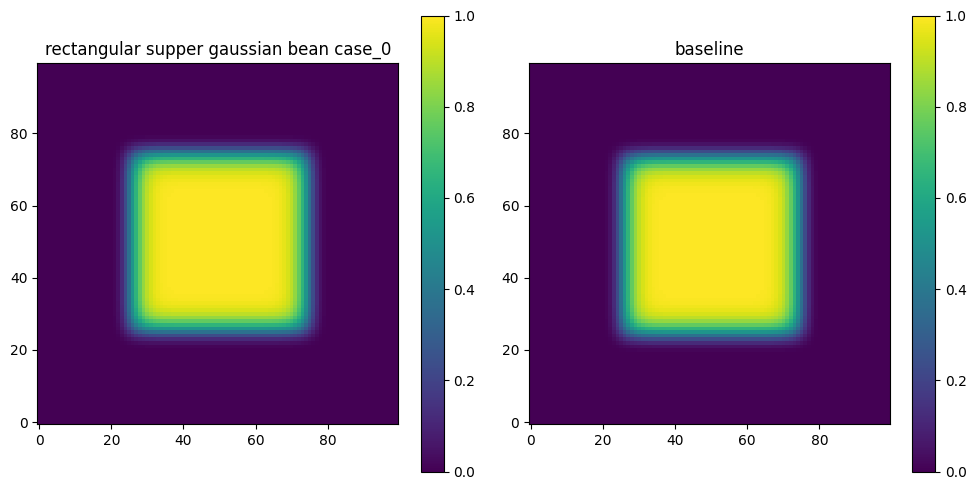

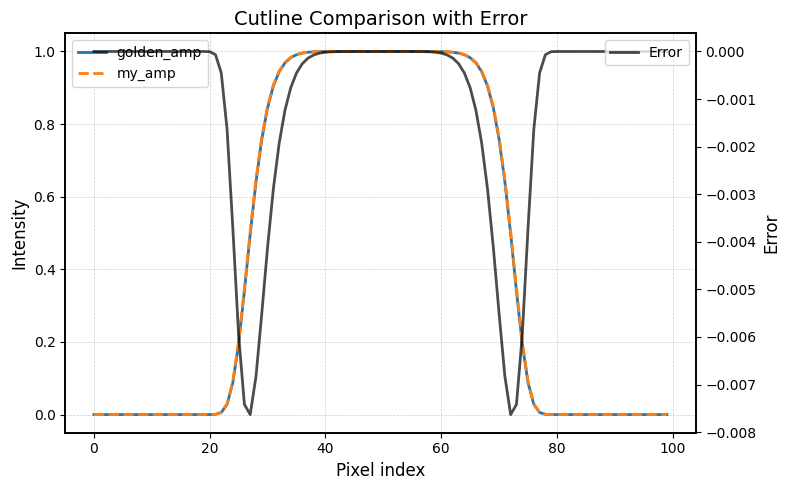

(r=[2.0, 2.2],order=[10.0, 20.0],fraction=0.9)
golden_edge=[0.7226, 0.36684], my_edge=[0.7225995962922207, 0.366844565420192]
golden_order=[10.0, 20.0], my_order=[9.999995192575028, 20.00023066194712]


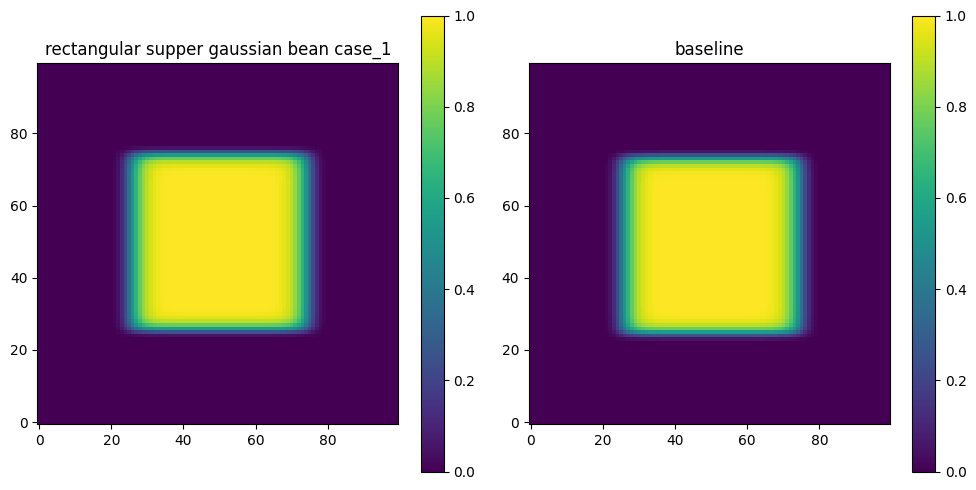

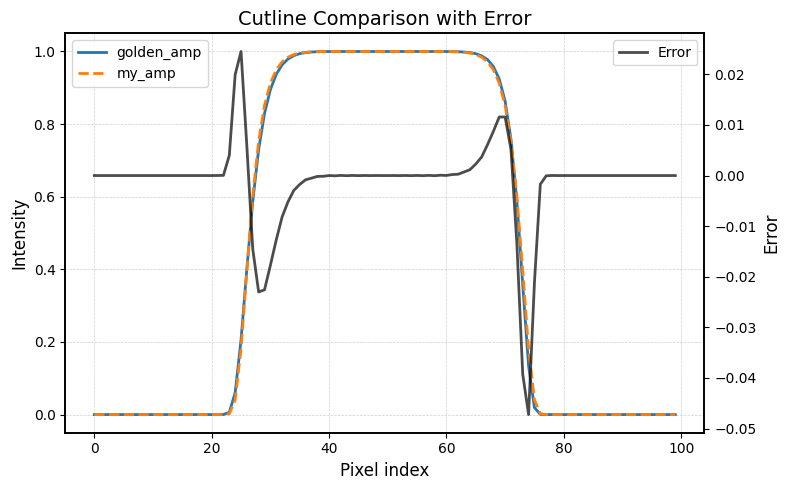

In [23]:

def run_test():
    case_index = -1
    if -1 == case_index:
        for case_index in range(len(test)):
            supper_gaussian_wave_test(case_index)
    else:
        supper_gaussian_wave_test(case_index)
run_test()

(r=2.0,order=10.0,fraction=0.9)
golden_edge=0.7226, my_edge=0.7225995962922207
golden_order=10.0, my_order=9.999995192575028


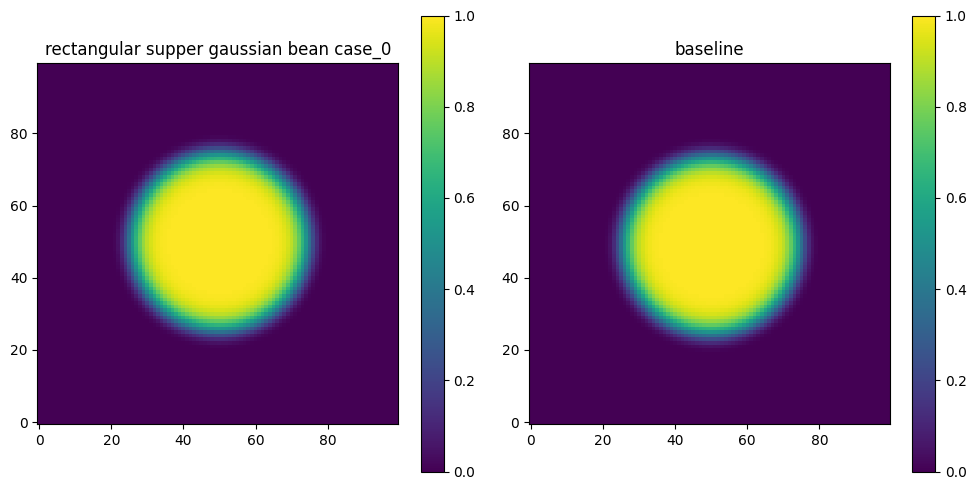

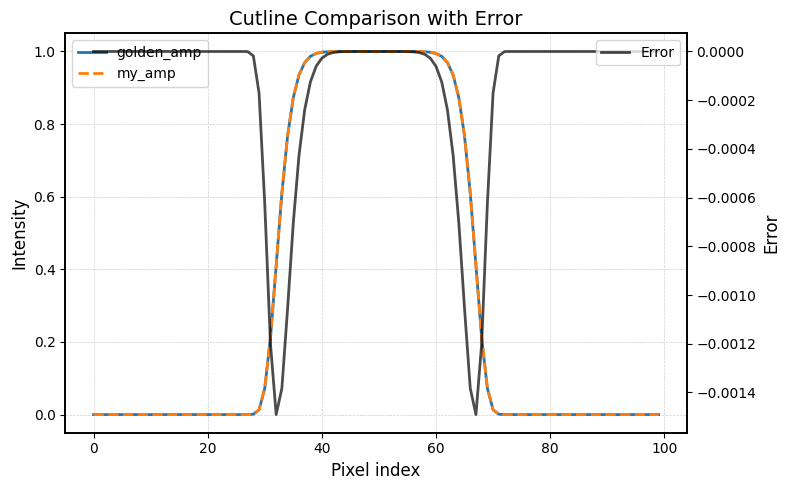

In [24]:
test = [
    [2, 0.9, 10, 722.6* 1e-3]
]
    
def supper_gaussian_wave_test(case_index):
    r, fraction, order, edge = [float(x) for x in test[case_index]]
    baseline = f"{notebook_dir}/golden_data/SG/circ/{case_index}.fin"
    baseline_meta, baseline = parse_file(baseline)
    baseline = np.real(baseline)
    
    U = supper_gaussian_wave.generate_circular(r,fraction, order, start, end, shape)
    U = np.array(list(U)).reshape(*shape)
    print(f"(r={r},order={order},fraction={fraction})")
    print(f"golden_edge={edge}, my_edge={supper_gaussian_wave.edge_width(order, fraction, r, lb, ub)}")
    print(f"golden_order={order}, my_order={supper_gaussian_wave.edge_order(edge, fraction, r, lb, ub, 0.1, 1e6, 1e-12)}")

    _ = show_side_by_side(U, baseline, f"rectangular supper gaussian bean case_{case_index}", "baseline")

    U = shift(U, -0.5, -0.5)
    a, b = np.diag(baseline), np.array(np.diag(U))
    plot_cutlines_with_error(a, b, "golden_amp", "my_amp")

run_test()